In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
df1=pd.read_csv(r'C:\Users\SUNEETHA\Desktop\innomatics\movies.csv')
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### What is the shape of "movies.csv"?

In [4]:
df1.shape

(9742, 3)

In [5]:
df2=pd.read_csv(r'C:\Users\SUNEETHA\Desktop\innomatics\ratings.csv')
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### What is the shape of "ratings.csv"?

In [6]:
df2.shape

(100836, 4)

In [10]:
unique_user_ids = df2['userId'].unique()
unique_user_ids

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### Which movie has recieved maximum number of user ratings? *

In [11]:

# Group by movieId and count the number of ratings for each movie
movie_ratings_count = df2.groupby('movieId')['rating'].count()

#movieId with the maximum number of ratings
max_rated_movie_id = movie_ratings_count.idxmax()



#  movie with the maximum ratings
max_rated_movie_title = df1.loc[df1['movieId'] == max_rated_movie_id, 'title'].values[0]

print(f"The movie with the maximum number of ratings is: {max_rated_movie_title} (MovieID: {max_rated_movie_id})")

The movie with the maximum number of ratings is: Forrest Gump (1994) (MovieID: 356)


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [12]:

tags_df = pd.read_csv(r'C:\Users\SUNEETHA\Desktop\innomatics\tags.csv') 

#  movieId for "Matrix, The (1999)"
matrix_movie_id = df1.loc[df1['title'] == 'Matrix, The (1999)', 'movieId'].values[0]

# Filter tags for the specific movieId
matrix_tags = tags_df.loc[tags_df['movieId'] == matrix_movie_id, 'tag']

print(f"Tags submitted by users to 'Matrix, The (1999)' (MovieID: {matrix_movie_id}):")
print(matrix_tags.tolist())


Tags submitted by users to 'Matrix, The (1999)' (MovieID: 2571):
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"

In [13]:

# movieId for "Terminator 2: Judgment Day (1991)"
terminator2_movie_id = df1.loc[df1['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

# Filter ratings for the specific movieId
terminator2_ratings = df2.loc[df2['movieId'] == terminator2_movie_id, 'rating']
average user rating
average_rating = terminator2_ratings.mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' (MovieID: {terminator2_movie_id}) is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' (MovieID: 589) is: 3.97


###  How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

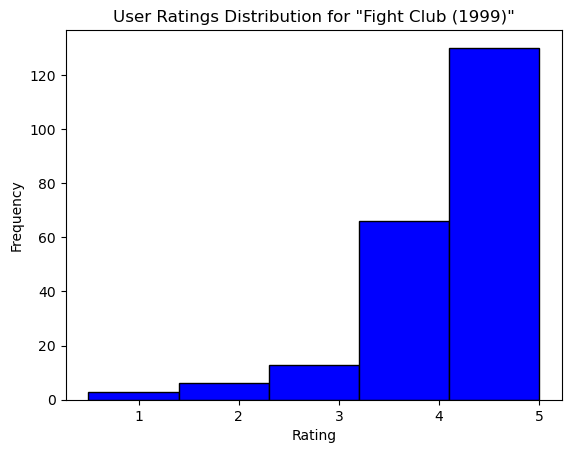

In [15]:

# movieId for "Fight Club (1999)"
fight_club_movie_id = df1.loc[df1['title'] == 'Fight Club (1999)', 'movieId'].values[0]

# Filter ratings for the specific movieId
fight_club_ratings = df2.loc[df2['movieId'] == fight_club_movie_id, 'rating']

# Plotting 
plt.hist(fight_club_ratings, bins=5, color='blue', edgecolor='black')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 

In [16]:
# Group ratings by movieId and calculate count and mean
ratings_grouped = df2.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

print(ratings_grouped.head())

   movieId  rating_count  rating_mean
0        1           215     3.920930
1        2           110     3.431818
2        3            52     3.259615
3        4             7     2.357143
4        5            49     3.071429


###  2.Apply inner join on dataframe created from movies.csv and the grouped df from step 1.

In [17]:
merged_df = pd.merge(df1, ratings_grouped, on='movieId', how='inner')

# merged DataFrame
print(merged_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
3                         Comedy|Drama|Romance             7     2.357143  
4                                       Comedy            49     3.071429  


###  3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [18]:
# inner join on movieId
merged_df = pd.merge(df1, ratings_grouped, on='movieId', how='inner')

# Filter only movies with more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Display the filtered DataFrame
print(filtered_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


### Which movie is the most popular based on  average user ratings?

In [19]:
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]

# most popular movie
print(f"The most popular movie based on average user ratings is:")
print(f"{most_popular_movie['title']} (MovieID: {most_popular_movie['movieId']})")

The most popular movie based on average user ratings is:
Shawshank Redemption, The (1994) (MovieID: 318)


### Select all the correct options which comes under top 5 popular movies based on number of user ratings

In [20]:
top_movies_by_ratings = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

# top 5 popular movies based on number of user ratings
print("Top 5 popular movies based on number of user ratings:")
print(top_movies_by_ratings[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings

In [21]:
# Filter for Sci-Fi genre movies
scifi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Sort the Sci-Fi movies 
sorted_scifi_movies = scifi_movies.sort_values(by='rating_count', ascending=False)

# Select the third most popular Sci-Fi movie
third_most_popular_scifi_movie = sorted_scifi_movies.iloc[2]
print(f"The third most popular Sci-Fi movie based on number of user ratings is:")
print(f"{third_most_popular_scifi_movie['title']} (MovieID: {third_most_popular_scifi_movie['movieId']})")

The third most popular Sci-Fi movie based on number of user ratings is:
Jurassic Park (1993) (MovieID: 480)


### web srapping script

In [27]:

import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', {'data-testid': 'default-ratings-score'})
    return imdb_rating.text if imdb_rating else np.nan

### Mention the movieId of the movie which has the highest IMDB rating. 

In [29]:
print(filtered_df.columns)


Index(['movieId', 'title', 'genres', 'rating_count', 'rating_mean'], dtype='object')


In [33]:
links_df = pd.read_csv(r'C:\Users\SUNEETHA\Desktop\innomatics\links.csv') 
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [34]:
merged_df = pd.merge(filtered_df, links_df[['movieId', 'imdbId']], on='movieId', how='inner')

# Apply the scrapper function to get IMDb ratings for each movie
merged_df['imdb_rating'] = merged_df['imdbId'].apply(scrapper)

# Convert IMDb rating to numeric (assuming it's in the form of 'X.X/10')
merged_df['imdb_rating'] = pd.to_numeric(merged_df['imdb_rating'].str.extract('(\d+\.\d+)/10')[0])

# Find the movie with the highest IMDb rating
highest_rated_movie = merged_df.loc[merged_df['imdb_rating'].idxmax()]

# Display the movieId of the movie with the highest IMDb rating
print(f"The movieId of the movie with the highest IMDb rating is: {highest_rated_movie['movieId']}")

AttributeError: Can only use .str accessor with string values!

In [ ]:
merged_df = pd.merge(filtered_df, links_df[['movieId', 'imdbId']], on='movieId', how='inner')

# Apply the scrapper function to get IMDb ratings for each movie
merged_df['imdb_rating'] = merged_df['imdbId'].apply(scrapper)

# Convert IMDb rating to numeric (assuming it's in the form of 'X.X/10')
merged_df['imdb_rating'] = pd.to_numeric(merged_df['imdb_rating'].str.extract('(\d+\.\d+)')[0])

# Find the movie with the highest IMDb rating
highest_rated_movie = merged_df.loc[merged_df['imdb_rating'].idxmax()]

# Display the movieId of the movie with the highest IMDb rating
print(f"The movieId of the movie with the highest IMDb rating is: {highest_rated_movie['movieId']}")

In [ ]:
merged_df = pd.merge(filtered_df, links_df[['movieId', 'imdbId']], on='movieId', how='inner')

# Filter for Sci-Fi genre movies
scifi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False)]

# Apply the scrapper function to get IMDb ratings for each Sci-Fi movie
scifi_movies['imdb_rating'] = scifi_movies['imdbId'].apply(scrapper)

# Convert IMDb rating to numeric (assuming it's in the form of 'X.X')
scifi_movies['imdb_rating'] = pd.to_numeric(scifi_movies['imdb_rating'].str.extract('(\d+\.\d+)')[0])

# Find the Sci-Fi movie with the highest IMDb rating
highest_rated_scifi_movie = scifi_movies.loc[scifi_movies['imdb_rating'].idxmax()]

# Display the movieId of the Sci-Fi movie with the highest IMDb rating
print(f"The movieId of the Sci-Fi movie with the highest IMDb rating is: {highest_rated_scifi_movie['movieId']}")